#**Weather Prediction**

📌 Dataset Description – Weather Prediction

This project utilizes the “Weather Prediction” dataset available on Kaggle, published by godeyeisnub. The dataset contains historical weather-related attributes used for analyzing patterns and building machine learning models for weather forecasting.

🔎 Dataset Overview

The dataset includes meteorological features such as:

Temperature

Humidity

Wind Speed

Atmospheric Pressure

Weather Condition Labels

These features enable exploratory data analysis (EDA), visualization of weather trends, and the development of classification or regression models for predicting weather conditions.

🎯 Purpose of Using This Dataset

The dataset is used in this project to:

Perform data preprocessing and cleaning

Conduct exploratory data analysis

Train and evaluate machine learning models

Predict future weather conditions based on historical data

📎 Source

Weather Prediction Dataset – Kaggle
Author: godeyeisnub
Platform: Kaggle

(Original dataset link: https://www.kaggle.com/datasets/godeyeisnub/weather-forecast
)

In [286]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("godeyeisnub/weather-forecast")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'weather-forecast' dataset.
Path to dataset files: /kaggle/input/weather-forecast


In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
# data = pd.read_csv('/content/Dataset11-Weather-Data.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [289]:
data.shape

(8784, 9)

In [290]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather',
       'std_Weather'],
      dtype='object')

In [291]:
data.dtypes

,0
Date/Time,object
Temp_C,float64
Dew Point Temp_C,float64
Rel Hum_%,int64
Wind Speed_km/h,int64
Visibility_km,float64
Press_kPa,float64
Weather,object
std_Weather,object


In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
 8   std_Weather       8784 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 617.8+ KB


In [293]:
data.Weather.value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [294]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [295]:
data.Weather.nunique()

50

In [296]:
x = 'Thunderstorms,Moderate Rain Showers,Fog'

In [297]:
list_of_list = [w.split() for w in x.split(',')]
list_of_list

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [298]:
from itertools import chain
flat_list = list(chain(*list_of_list))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [299]:
def create_list(x):
  list_of_list = [w.split() for w in x.split(',')]
  flat_list = list(chain(*list_of_list))
  return flat_list

def Get_Weather(list1):
  if 'Fog' in list1 and 'Rain' in list1:
    return 'RAIN+FOG'
  elif 'Snow' in list1 and 'Rain' in list1:
    return 'SNOW+RAIN'
  elif 'Snow' in list1:
    return 'SNOW'
  elif 'Rain' in list1:
    return 'RAIN'
  elif 'Fog' in list1:
    return 'FOG'
  elif 'Clear' in list1:
    return 'Clear'
  elif 'Cloudy' in list1:
    return 'Cloudy'
  else:
    return 'RAIN'

In [300]:
create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [301]:
Get_Weather(create_list(x))

'RAIN+FOG'

In [302]:
data['std_Weather'] = data['Weather'].apply(lambda x : Get_Weather(create_list(x)))

In [303]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [304]:
data.std_Weather.value_counts()

,count
std_Weather,
Cloudy,3797
Clear,3432
RAIN,603
SNOW,556
FOG,241
RAIN+FOG,129
SNOW+RAIN,26


In [305]:
Cloudy_df = data[data['std_Weather'] == 'Cloudy'].sample(600)
Cloudy_df.shape

(600, 9)

In [306]:
Cloudy_df = data[data['std_Weather'] == 'Cloudy']
Cloudy_df_sample = Cloudy_df.sample(600)
Cloudy_df_sample.shape

(600, 9)

In [307]:
Clear_df = data[data['std_Weather'] == 'Clear'].sample(600)
Clear_df.shape

(600, 9)

In [308]:
#Cloudy_df = data[data['std_Weather'] = 'Cloudy'].sample(700)
#Clear_df = data[data['std_Weather'] = 'Clear'].sample(700)
rain_df = data[data['std_Weather'] == 'RAIN']
snow_df = data[data['std_Weather'] == 'SNOW']

In [309]:
rain_df.shape

(603, 9)

In [310]:
snow_df.shape

(556, 9)

In [311]:
Weather_df = pd.concat([Cloudy_df_sample,Clear_df, rain_df, snow_df], axis = 0)
Weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
212,1/9/2012 20:00,-1.5,-6.2,70,15,25.0,100.77,Mostly Cloudy,Cloudy
8047,12/1/2012 7:00,-11.3,-14.2,79,24,24.1,103.19,Cloudy,Cloudy
8206,12/7/2012 22:00,2.3,-2.5,71,4,25.0,101.19,Cloudy,Cloudy
292,1/13/2012 4:00,-5.0,-7.4,83,24,11.3,99.13,Cloudy,Cloudy
2085,3/27/2012 21:00,2.1,-10.7,38,9,25.0,101.67,Cloudy,Cloudy


In [312]:
Weather_df.shape

(2359, 9)

In [313]:
Weather_df.std_Weather.value_counts()

,count
std_Weather,
RAIN,603
Cloudy,600
Clear,600
SNOW,556


In [314]:
Weather_df.drop(columns=['Date/Time','Weather'],axis = 1, inplace=True)

In [315]:
Weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather
212,-1.5,-6.2,70,15,25.0,100.77,Cloudy
8047,-11.3,-14.2,79,24,24.1,103.19,Cloudy
8206,2.3,-2.5,71,4,25.0,101.19,Cloudy
292,-5.0,-7.4,83,24,11.3,99.13,Cloudy
2085,2.1,-10.7,38,9,25.0,101.67,Cloudy


In [316]:
Weather_df[Weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather


In [317]:
Weather_df.isnull().sum()

,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
std_Weather,0


In [318]:
Weather_df.dtypes

,0
Temp_C,float64
Dew Point Temp_C,float64
Rel Hum_%,int64
Wind Speed_km/h,int64
Visibility_km,float64
Press_kPa,float64
std_Weather,object


In [319]:
Weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,6.801780,1.753116,72.429843,16.826621,23.442900,100.800348
std,11.389315,10.508322,15.772989,9.336833,12.987633,0.918284
min,-20.600000,-26.800000,21.000000,0.000000,0.600000,97.520000
25%,-3.000000,-6.800000,62.000000,9.000000,16.100000,100.300000
50%,5.500000,0.600000,75.000000,15.000000,24.100000,100.820000
75%,16.600000,10.600000,85.000000,22.000000,25.000000,101.390000
max,32.800000,23.100000,99.000000,83.000000,48.300000,103.650000


In [320]:
cols = ['Temp_C' , 'Dew Point Temp_C' , 'Rel Hum_%', 'Wind Speed_km/h' , 'Visibility_km' , 'Press_kPa']

In [321]:
cor_matrix = Weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.944480,-0.254064,-0.112477,0.410221,-0.095535
Dew Point Temp_C,0.944480,1.000000,0.072103,-0.111324,0.210475,-0.203505
Rel Hum_%,-0.254064,0.072103,1.000000,0.018380,-0.650607,-0.332754
Wind Speed_km/h,-0.112477,-0.111324,0.018380,1.000000,-0.121849,-0.397987
Visibility_km,0.410221,0.210475,-0.650607,-0.121849,1.000000,0.319093
Press_kPa,-0.095535,-0.203505,-0.332754,-0.397987,0.319093,1.000000


<Axes: >

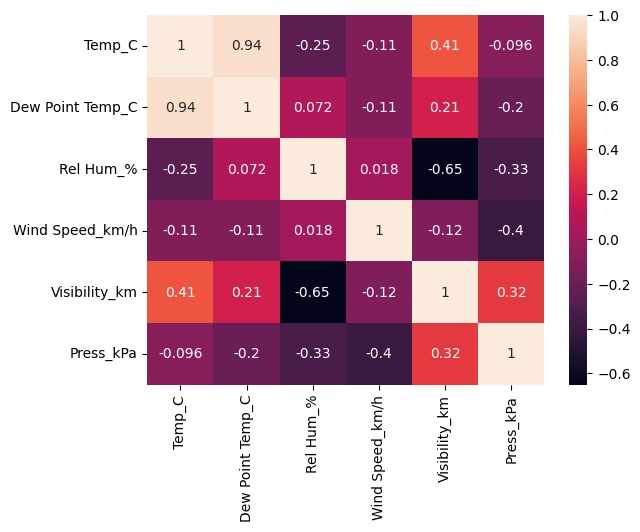

In [322]:
sns.heatmap(cor_matrix, annot=True)

In [323]:
Weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'std_Weather'],
      dtype='object')

In [324]:
#cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h','Visibility_km', 'Press_kPa']

<Axes: ylabel='Frequency'>

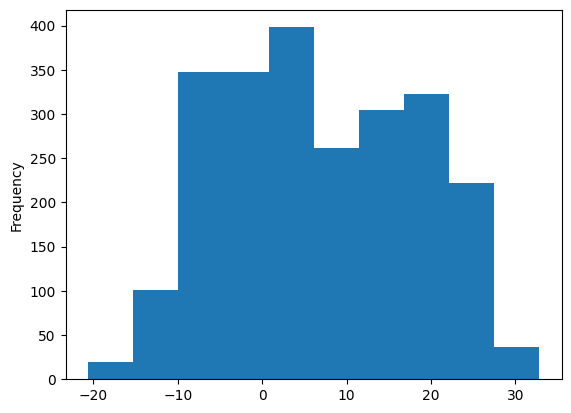

In [325]:
Weather_df['Temp_C'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

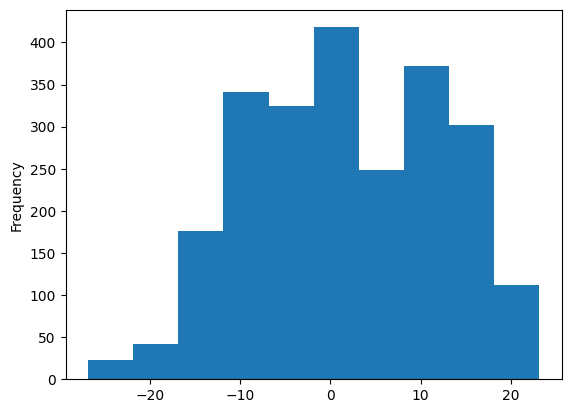

In [326]:
Weather_df['Dew Point Temp_C'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

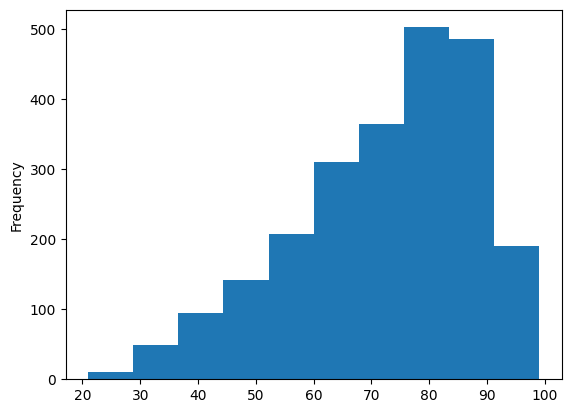

In [327]:
Weather_df['Rel Hum_%'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

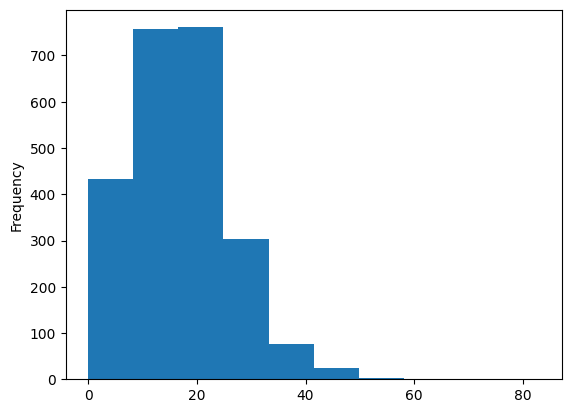

In [328]:
Weather_df['Wind Speed_km/h'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

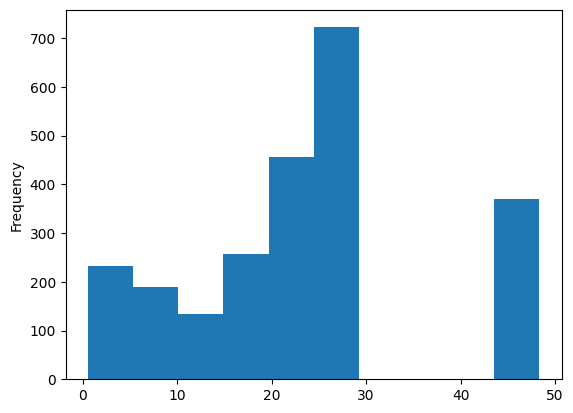

In [329]:
Weather_df['Visibility_km'].plot(kind = 'hist')

<Axes: >

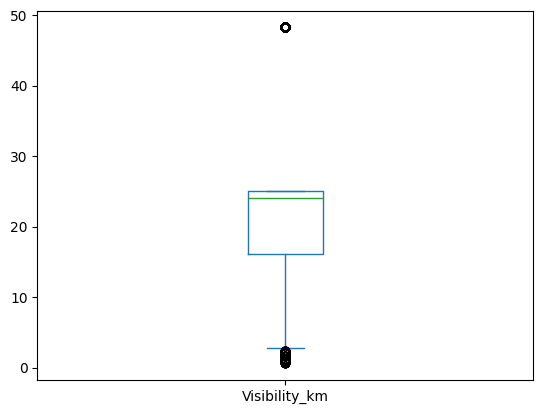

In [330]:
Weather_df['Visibility_km'].plot(kind='box')

<Axes: >

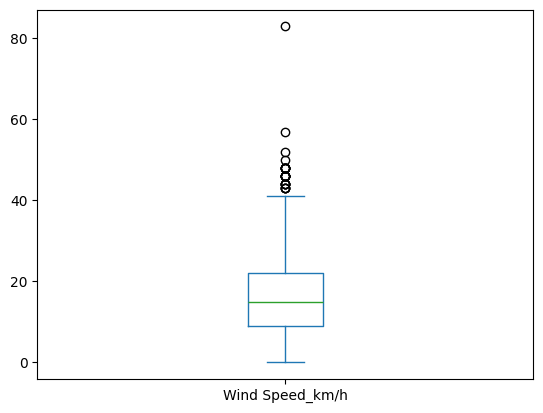

In [331]:
Weather_df['Wind Speed_km/h'].plot(kind = 'box')

In [332]:
Weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather
212,-1.5,-6.2,70,15,25.0,100.77,Cloudy
8047,-11.3,-14.2,79,24,24.1,103.19,Cloudy
8206,2.3,-2.5,71,4,25.0,101.19,Cloudy
292,-5.0,-7.4,83,24,11.3,99.13,Cloudy
2085,2.1,-10.7,38,9,25.0,101.67,Cloudy


In [333]:
from sklearn.preprocessing import LabelEncoder

In [334]:
lable_Encoder = LabelEncoder()

In [335]:
Weather_df['std_Weather'] = lable_Encoder.fit_transform(Weather_df['std_Weather'])

In [336]:
lable_Encoder.classes_

array(['Clear', 'Cloudy', 'RAIN', 'SNOW'], dtype=object)

In [337]:
Weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather
212,-1.5,-6.2,70,15,25.0,100.77,1
8047,-11.3,-14.2,79,24,24.1,103.19,1
8206,2.3,-2.5,71,4,25.0,101.19,1
292,-5.0,-7.4,83,24,11.3,99.13,1
2085,2.1,-10.7,38,9,25.0,101.67,1


In [338]:
Weather_df.std_Weather.value_counts()

,count
std_Weather,
2,603
1,600
0,600
3,556


In [339]:
#Independent variable
X = Weather_df.drop('std_Weather', axis = 1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
212,-1.5,-6.2,70,15,25.0,100.77
8047,-11.3,-14.2,79,24,24.1,103.19
8206,2.3,-2.5,71,4,25.0,101.19
292,-5.0,-7.4,83,24,11.3,99.13
2085,2.1,-10.7,38,9,25.0,101.67
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [340]:
#Target variable
Y = Weather_df['std_Weather']
Y

,std_Weather
212,1
8047,1
8206,1
292,1
2085,1
...,...
8779,3
8780,3
8781,3
8782,3


In [341]:
from sklearn.preprocessing import StandardScaler

In [342]:
std_scaler = StandardScaler()

In [343]:
X_std = std_scaler.fit_transform(X)
X_std

array([[-0.72906407, -0.75700024, -0.15408357, -0.19567756,  0.11991643,
        -0.03305519],
       [-1.5897021 , -1.51846305,  0.41663315,  0.76845105,  0.05060505,
         2.6028549 ],
       [-0.39534729, -0.40482368, -0.0906706 , -1.37405696,  0.11991643,
         0.42441681],
       ...,
       [-0.64124387, -0.30964083,  1.30441471,  1.19695266, -1.43573905,
        -0.92621481],
       [-0.6148978 , -0.33819569,  1.05076283,  1.19695266, -1.05837708,
        -0.96978357],
       [-0.59733376, -0.36675054,  0.86052393,  1.41120346, -0.93515684,
        -0.99156795]])

In [344]:
from sklearn.model_selection import train_test_split

In [345]:
x_train, x_test, y_train, y_test = train_test_split(X_std, Y, test_size = 0.2, random_state = 42)

In [346]:
x_train.shape , x_test.shape

((1887, 6), (472, 6))

In [347]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()

In [348]:
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [349]:
y_pred_dt = decision_tree_model.predict(x_test)

In [350]:
y_pred_dt = decision_tree_model.predict(x_test)

In [351]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [352]:
accuracy_score(y_test, y_pred_dt)

0.6165254237288136

In [353]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.55      0.65      0.59       118
           1       0.44      0.44      0.44       128
           2       0.75      0.70      0.72       126
           3       0.80      0.70      0.75       100

    accuracy                           0.62       472
   macro avg       0.64      0.62      0.63       472
weighted avg       0.63      0.62      0.62       472



In [354]:
cm = confusion_matrix(y_test, y_pred_dt)
cm

array([[77, 33,  5,  3],
       [45, 56, 20,  7],
       [14, 17, 88,  7],
       [ 5, 20,  5, 70]])

<Axes: >

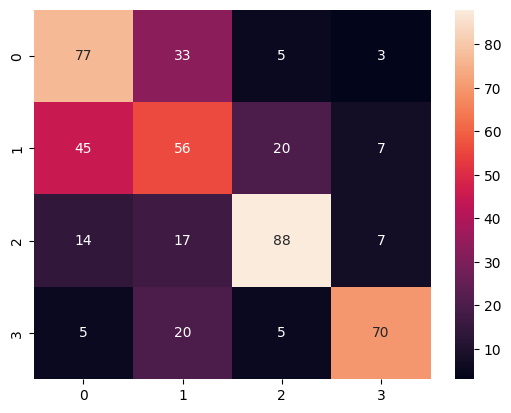

In [355]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot = True, fmt = 'd')

In [356]:
from sklearn.ensemble import RandomForestClassifier

In [357]:
rf_model = RandomForestClassifier()

In [358]:
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [359]:
rf_pred_rf = rf_model.predict(x_test)

In [360]:
accuracy_score(y_test, rf_pred_rf)

0.690677966101695

In [361]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [362]:
df_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
svm_model = SVC()
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()

In [363]:
model_list = [df_model, rf_model, lr_model, svm_model, nb_model, knn_model]

In [364]:
acc_list = []
for model in model_list:
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  acc_list.append(acc)

In [365]:
acc_list

[0.6016949152542372,
 0.6800847457627118,
 0.6101694915254238,
 0.625,
 0.5953389830508474,
 0.6016949152542372]

In [366]:
model_df = pd.DataFrame({'Model' : model_list, "Accuracy" : acc_list})
model_df

,Model,Accuracy
0,DecisionTreeClassifier(),0.601695
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.680085
2,LogisticRegression(),0.610169
3,SVC(),0.625000
4,GaussianNB(),0.595339
5,KNeighborsClassifier(),0.601695


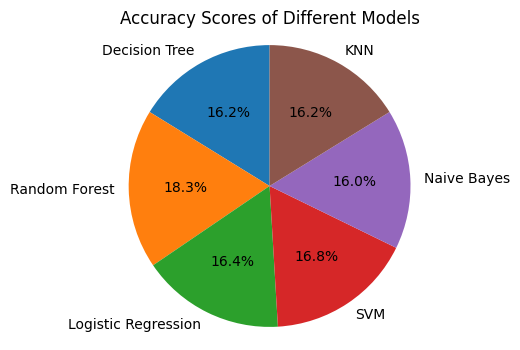

In [367]:
import matplotlib.pyplot as plt

# Assuming 'model_df' from the previous code is available
model_names = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'Naive Bayes', 'KNN']
plt.figure(figsize=(4, 4))
plt.pie(model_df['Accuracy'], labels=model_names, autopct='%1.1f%%', startangle=90)
plt.title('Accuracy Scores of Different Models')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [368]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model,X_std, Y, cv = 5, scoring = 'accuracy')
print('Cross-validation scroes = ' , scores)

Cross-validation scroes =  [0.59745763 0.65042373 0.61864407 0.56779661 0.69214437]


In [369]:
scores.mean()

np.float64(0.6252932815142682)

In [370]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [371]:
parameters = {
    'n_estimators' : [50,100],
    'max_features' : ['sqrt' , 'log2' , None]
}

In [372]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=parameters)

In [373]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

In [374]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

In [375]:
Random_foret_model_new = RandomForestClassifier(max_features='log2', n_estimators=100)

In [376]:
Random_foret_model_new.fit(x_train, y_train)

RandomForestClassifier(max_features='log2')

In [377]:
y_pred_rf = Random_foret_model_new.predict(x_test)

In [378]:
accuracy_score(y_test, y_pred_rf)

0.690677966101695

In [379]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_foret_model_new,X_std, Y, cv = 5, scoring = 'accuracy')
print('Cross-validation scroes = ' , scores)

Cross-validation scroes =  [0.59110169 0.65254237 0.61864407 0.56567797 0.70276008]


In [380]:
scores.mean()

np.float64(0.6261452373241212)